In [79]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

CURR_DIR = os.getcwd()
DATA_DIR = os.path.join(CURR_DIR, 'data')
X_FILE_NAME = os.path.join(DATA_DIR, 'x_assignment.csv')
Y_FILE_NAME = os.path.join(DATA_DIR, 'y_assignment.csv')

PROCESSED_FILE_NAME = os.path.join(DATA_DIR, 'processed_data.pickle')

In [44]:
x_df = pd.read_csv(X_FILE_PATH, encoding='ISO-8859-1')
y_df = pd.read_csv(Y_FILE_PATH, encoding='ISO-8859-1')

print('================================= Data exploration =================================')
# combind x_assignment and y_assignment'
print(f'Same order of files and dimenstions: {sum(x_df['Unnamed: 0'] == y_df['Unnamed: 0']) == len(y_df)}')
x_df['broccoli'] = y_df['broccoli']
print('-'*50)

# Examine fearures & dtypes:
columns_starting_with_f = [col for col in x_df.columns if col.startswith('f')]
print(f'Number of features: {len(columns_starting_with_f)}\nDtypes: {x_df.dtypes.unique()}')

# drop small set of 20 labels with  nan values 
print('-'*50)
value_counts = x_df['broccoli'].value_counts(dropna=False)
print(f'Labels: counts: {value_counts}')
x_df = x_df.dropna(subset=['broccoli'])
split_percentage  = round(float(value_counts['malicious']/(value_counts['benign'] + value_counts['malicious'])),2)

print('-'*50)
print(f"Data Split/ Random malicious guess chance: {split_percentage}%")

print('-'*50)
print(f"The percentage of NaN values in eacg feature:")
# Count the number of NaN values in each column
nan_counts = x_df.isna().sum() / len(x_df)

# Filter and display only columns that have missing values
nan_status = nan_counts[nan_counts > 0]

# Display the result
print("Number of NaN values in each column:")
print(nan_status)

print('Remove f_5 as it all NaN')
print('-'*50)
print('All the float data type columns do not have NaN')
x_df.drop('f_5', axis=1, inplace=True) 

x_df['broccoli_encoded'] = x_df['broccoli'].map({'malicious': 1, 'benign': 0})
X_train, X_test, y_train, y_test = train_test_split(x_df, x_df['broccoli_encoded'], test_size=0.2, stratify=x_df['broccoli_encoded'], random_state=42)

================================= Data exploration =================================
Same order of files and dimenstions: True
--------------------------------------------------
Number of features: 104
Dtypes: [dtype('O') dtype('float64')]
--------------------------------------------------
Labels: counts: broccoli
malicious    33513
benign       26467
NaN             20
Name: count, dtype: int64
--------------------------------------------------
Data Split/ Random malicious guess chance: 0.56%
--------------------------------------------------
The percentage of NaN values in eacg feature:
Number of NaN values in each column:
f_0     0.847833
f_1     0.847833
f_4     0.829543
f_5     1.000000
f_8     0.829543
f_41    0.569923
f_42    0.697416
f_43    0.896816
f_44    0.902284
f_45    0.257853
f_46    0.066622
f_47    0.745248
f_48    0.208870
f_49    0.771307
f_59    0.000017
dtype: float64
Remove f_5 as it all NaN
--------------------------------------------------
All the float data ty

### 1.check correlation between textual features and labels

### 2.check correlation between float features

#### 1.check correlation between textual features and labels


In [45]:
### 1.check correlation between textual features and labels

# Examine only the object type features
object_columns = X_train.select_dtypes(include='object').columns
print(f'Object lebngth: {len(object_columns)}')
unique_values_dict = {col: X_train[col].unique() for col in object_columns}

Object lebngth: 20


In [ ]:
# Ispect the values manually
print(unique_values_dict['f_0']) # 'Fake TimeStamp Responder',
print(unique_values_dict['f_1']) #  'NO LIABILITY ACCEPTED, (c)97 VeriSign, Inc.'
print(unique_values_dict['f_2']) #  'no_signature' 'certificate_revoked' 'format_error'
print(unique_values_dict['f_4']) #  AmÃ©rica MÃ³vil'/??????????????'/ ????
print(unique_values_dict['f_6']) #  ['no_signature' 'bad_chain' 'certificate_revoked' 'format_error']
print(unique_values_dict['f_8']) # '????????????'
print(unique_values_dict['f_9']) # ['no_signature' 'invalid_timestamp']
# 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46', 'f_47', 'f_48','f_49': ['rdata' nan 'data' 'code' 'other'
print(unique_values_dict['f_59'])  #'f_59': True/False

In [47]:
correlation_df = pd.DataFrame()
x_df_tmp = X_train.copy()
x_df_tmp = x_df_tmp.fillna('-1')
correlation_df['broccoli_encoded'] = x_df_tmp['broccoli'].map({'malicious': 1, 'benign': 0})

feature_values_dict = {
    'f_0': ['Fake TimeStamp Responder'],
    'f_1': ['NO LIABILITY ACCEPTED, (c)97 VeriSign, Inc.'],
    'f_2': ['no_signature', 'certificate_revoked', 'format_error'],
    'f_6': ['no_signature', 'bad_chain', 'certificate_revoked', 'format_error'],
    'f_8': ['????????????'],
    'f_9': ['no_signature', 'invalid_timestamp'],
    'f_41': ['rdata', 'nan', 'data', 'code', 'other'],
    'f_42': ['rdata', 'nan', 'data', 'code', 'other'],
    'f_43': ['rdata', 'nan', 'data', 'code', 'other'],
    'f_44': ['rdata', 'nan', 'data', 'code', 'other'],
    'f_45': ['rdata', 'nan', 'data', 'code', 'other'],
    'f_46': ['rdata', 'nan', 'data', 'code', 'other'],
    'f_47': ['rdata', 'nan', 'data', 'code', 'other'],
    'f_48': ['rdata', 'nan', 'data', 'code', 'other'],
    'f_49': ['rdata', 'nan', 'data', 'code', 'other'],
    'f_59': [True, False],
    'broccoli': ['malicious','nenign']
}

# Create new binary columns for each value in the feature_values_dict
for feature, values in feature_values_dict.items():
    for value in values:
        # Create a new column name based on the feature and value
        col_name = f'{feature}_{value}'
        # Create a binary column where 1 indicates the value is present, and 0 indicates it is not
        correlation_df[col_name] = x_df_tmp[feature].apply(lambda x: 1 if value == x else 0)

# Calculate correlation with the 'broccoli' column
correlation_results = {}

for col in correlation_df.columns:
    if col != 'broccoli_encoded' and col.startswith('f_'):
        correlation_results[col] = correlation_df[col].corr(correlation_df['broccoli_encoded'])

correlation_above_threshold = {}

# Print correlation results
for col, corr in correlation_results.items():
    if 0.4 < abs(corr): 
        correlation_above_threshold[col] = (corr, sum(correlation_df[col])/len(correlation_df))
        
print('Columns and values that might have value as a feature to the models')
correlation_above_threshold

Columns and values that might have value as a feature to the models


/home/or/dev/malicious_files_detection/mfd/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/or/dev/malicious_files_detection/mfd/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


{'f_2_no_signature': (np.float64(0.40964343342671244), 0.8462195731910637),
 'f_9_no_signature': (np.float64(0.40832720653839494), 0.8537637545848616),
 'f_59_True': (np.float64(-0.4543171903204872), 0.23864204734911637),
 'f_59_False': (np.float64(0.45435858546702373), 0.7613371123707903)}

#### 2.check correlation between float features

In [48]:
### 2.check correlation between float features outliers  and labels

float64_columns = X_train.select_dtypes(include='float64').columns
print(f'Float length: {len(float64_columns)}')

correlation_df = pd.DataFrame()
x_df_tmp = X_train.copy()
x_df_tmp['broccoli_encoded'] = x_df_tmp['broccoli'].map({'malicious': 1, 'benign': 0})

correlation_results = {}

for col in x_df_tmp[float64_columns]:
    correlation_results[col] = x_df_tmp[col].corr(x_df_tmp['broccoli_encoded'])

float_correlation_above_threshold = {}
for col, corr in correlation_results.items():
    if 0.4 < abs(corr): 
        float_correlation_above_threshold[col] = corr
        
float_correlation_above_threshold        

Float length: 85


{'f_7': np.float64(0.40707262017450596),
 'f_71': np.float64(-0.4078625215580631)}

## check for outliers more than 2 stds

In [49]:
from scipy.stats import zscore

# Calculate the Z-scores of the DataFrame
z_scores = np.abs(zscore(X_train[float64_columns]))

# Identify outliers (Z-score > 3)
outliers = (z_scores > 2)
print("Number of outliers per feature:")
outlier_df = pd.DataFrame(outliers, columns=float64_columns)

#print(outlier_df.sum())
# Add the 'broccoli_encoded' column to the DataFrame for correlation analysis
x_df_with_broccoli = X_train.copy()
x_df_with_broccoli['broccoli_encoded'] = x_df_with_broccoli['broccoli'].map({'malicious': 1, 'benign': 0})


# Check if outliers in each feature are correlated with 'broccoli_encoded'
correlations = {}
for column in float64_columns:
    # Filter rows where the current feature has outliers
    outlier_indices = outlier_df[column]
    outlier_data = x_df_with_broccoli[outlier_indices]
    
    # Compute the correlation of the outlier data with 'broccoli_encoded'
    correlation = outlier_data['broccoli_encoded'].corr(outlier_data[column])
    correlations[column] = correlation

# Print the correlation results
print("Correlation of outliers with 'broccoli_encoded':")
outlier_sum_df = outlier_df.sum()
outlier_correlation_above_threshold = {}
for col, corr in correlations.items():
    if 0.4 < abs(corr): 
        outlier_correlation_above_threshold[col] = (corr, outlier_sum_df[col])
        
outlier_correlation_above_threshold  

Number of outliers per feature:


/home/or/dev/malicious_files_detection/mfd/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/or/dev/malicious_files_detection/mfd/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/or/dev/malicious_files_detection/mfd/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/or/dev/malicious_files_detection/mfd/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/or/dev/malicious_files_detection/mfd/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Correlation of outliers with 'broccoli_encoded':


{'f_68': (np.float64(-0.5223605782669561), np.int64(9)),
 'f_70': (np.float64(0.48233905175787156), np.int64(9)),
 'f_74': (np.float64(0.6884614019340043), np.int64(25)),
 'f_83': (np.float64(0.7761695512359454), np.int64(36)),
 'f_87': (np.float64(0.5692913704305114), np.int64(92))}

## Dimension reduction visualization 
1. Fill NaN vales with an avergae value 
2. Remove from the visualization columns that have high percentage of NaNs

/home/or/dev/malicious_files_detection/mfd/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/or/dev/malicious_files_detection/mfd/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/or/dev/malicious_files_detection/mfd/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/home/or/dev/malicious_files_detection/mfd/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


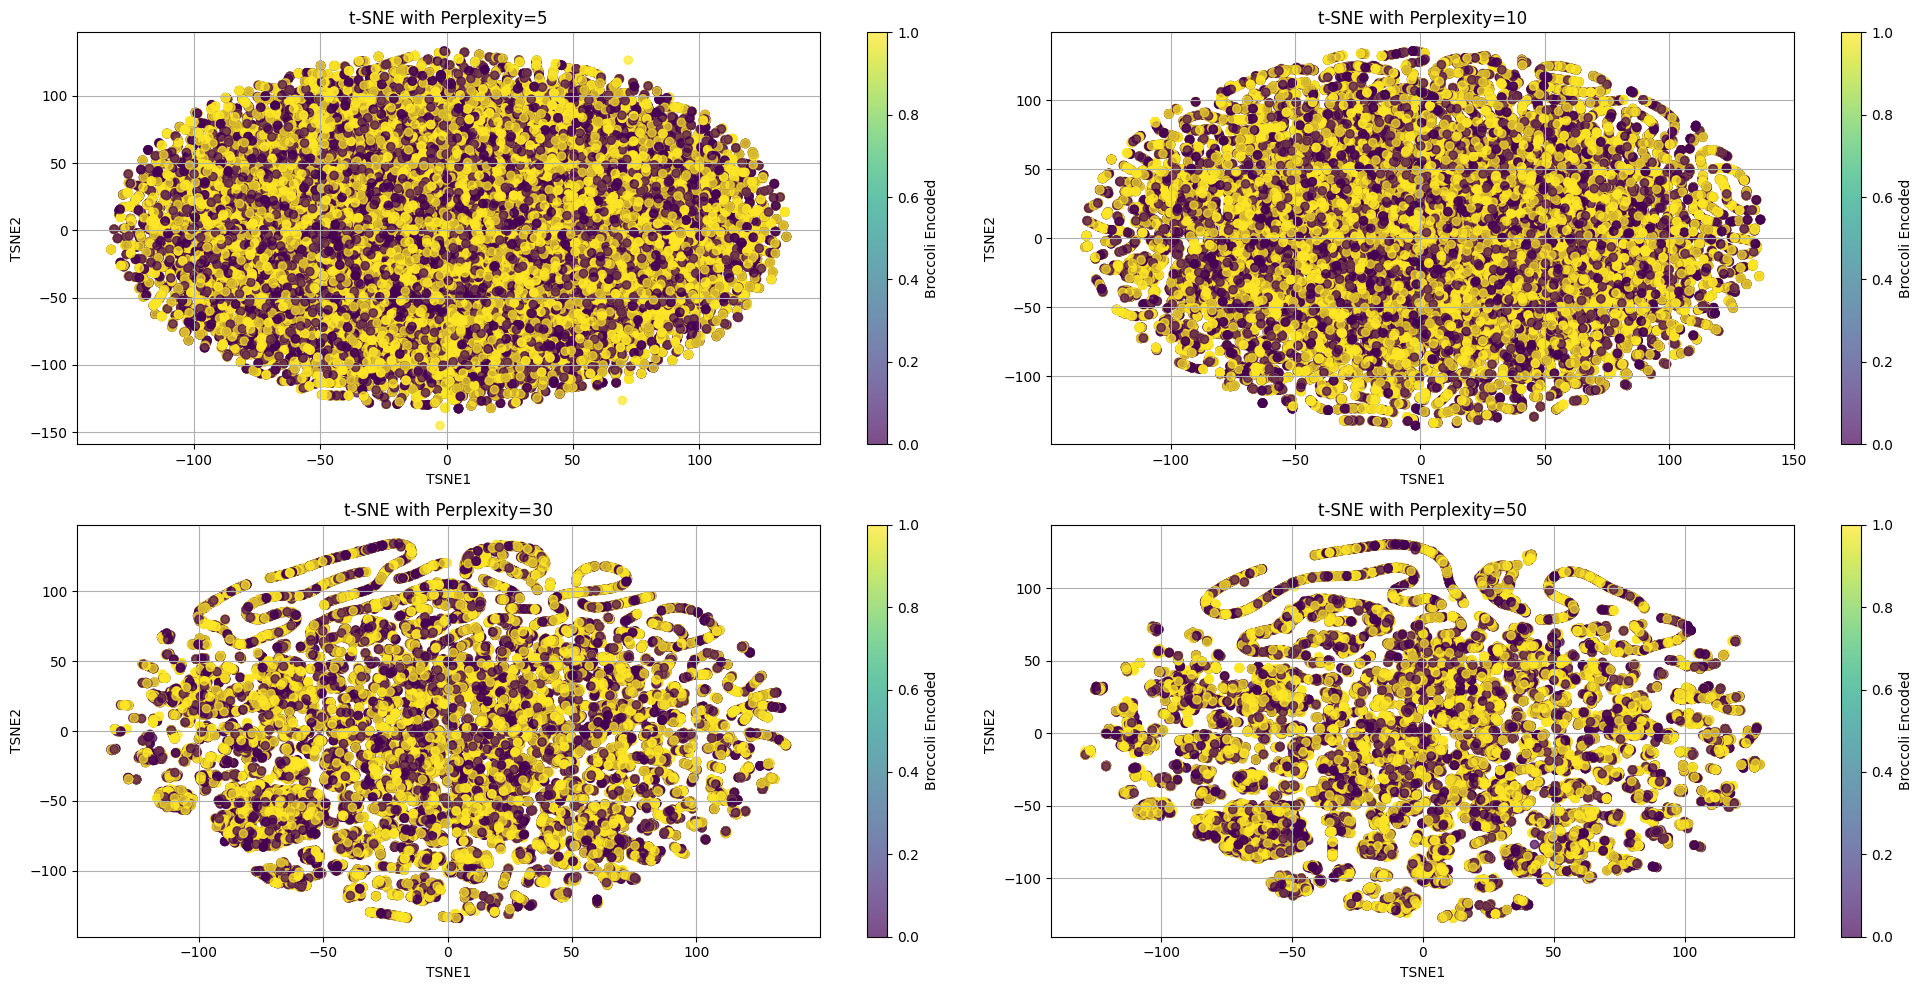

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Assuming x_df_with_broccoli_tmp is your DataFrame with features and 'broccoli_encoded' column
x_df_with_broccoli_tmp = x_df_with_broccoli.fillna('-1')
X = x_df_with_broccoli_tmp[float64_columns]  # Features
y = x_df_with_broccoli_tmp['broccoli_encoded']  # Target labels

# Standardize the features before applying t-SNE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# List of perplexity values to explore
perplexities = [5, 10, 30, 50]  # You can adjust these values or add more for exploration

# Create a subplot grid for visualization
plt.figure(figsize=(20, 10))  # Adjust the size as needed
n_plots = len(perplexities)

# Iterate over each perplexity value to generate subplots
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, n_iter=1000)
    X_tsne = tsne.fit_transform(X_scaled)
    
    # Create a DataFrame with the t-SNE results
    tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
    tsne_df['broccoli_encoded'] = y
    
    # Plot the t-SNE results in a subplot
    plt.subplot(2, 2, i + 1)  # Adjust layout if you add more perplexities (2 rows, 2 cols here)
    scatter = plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['broccoli_encoded'], cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label='Broccoli Encoded')
    plt.title(f't-SNE with Perplexity={perplexity}')
    plt.xlabel('TSNE1')
    plt.ylabel('TSNE2')
    plt.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

### Unclear clusters

### Add the correlated specific values and values more than 2 std away from the mean (Tested above as features)

In [50]:
#'f_59_True','f_59_False' - all possible values so only f_59
# 'f_2_no_signature','f_9_no_signature', 'f_7', 'f_71' - correlation
outlier_columns = ['f_68', 'f_70', 'f_74',  'f_83' ,'f_87'] #  2 std

In [51]:
def outlier_col_indication(df, df_target, column_names):
    
    for column_name in column_names:
        train_mean = df[column_name].mean()
        train_std_dev = df[column_name].std()
    
        # Calculate the Z-scores of the column
        df_target[f'{column_name}_outlier'] = (df_target[column_name] - train_mean) / train_std_dev
        
        # Check if values are more than 2 standard deviations away from the mean
        df_target[f'{column_name}_outlier']  = df_target[f'{column_name}_outlier'].abs() > 2
        
    return df_target
    
def col_encoding(df, col, val):
    df[f'{col}_{val}'] = np.where(df[col] == val, 1, 0)
    return df

X_train = outlier_col_indication(X_train, X_train, outlier_columns)
X_test = outlier_col_indication(X_train, X_test, outlier_columns)

X_train = col_encoding(X_train, 'f_2' ,'no_signature')
X_train = col_encoding(X_train, 'f_9' ,'no_signature')
X_test = col_encoding(X_test, 'f_2' ,'no_signature')
X_test = col_encoding(X_test, 'f_9' ,'no_signature')

In [52]:
count_nans = X_train[object_columns].isna().sum()

print(f"float64 NaN {X_train[float64_columns].isna().sum().sum()}")

float64 NaN 0


#### No NaNs in float data types

In [53]:
count_nans

Unnamed: 0        0
f_0           40621
f_1           40621
f_2               0
f_4           39754
f_6               0
f_8           39754
f_9               0
f_14              0
f_41          27384
f_42          33470
f_43          42982
f_44          43247
f_45          12341
f_46           3171
f_47          35757
f_48           9999
f_49          37002
f_59              1
broccoli          0
dtype: int64

### Fill textual column that have NaN values with the most common ones:

In [54]:
textual_column_names = ['f_0','f_1','f_4','f_8']
close_set_column_names = ['f_41','f_42','f_43','f_44','f_45','f_46','f_47','f_48','f_49']
true_false_column_names = ['f_59']

In [55]:
X_train.head(3)

,Unnamed: 0,f_0,f_1,f_2,f_3,f_4,f_6,f_7,f_8,f_9,...,f_103,broccoli,broccoli_encoded,f_68_outlier,f_70_outlier,f_74_outlier,f_83_outlier,f_87_outlier,f_2_no_signature,f_9_no_signature
30080,0aaa3f3ed2cb373d4967ab4ac05487270eba59c6,NaN,NaN,no_signature,1.0,NaN,no_signature,2.148205e+09,NaN,no_signature,...,1452.0,malicious,1,False,False,False,False,False,1,1
9385,fa6900fab06cd12dc2892c1a5e0796105b28af25,NaN,NaN,no_signature,1.0,NaN,no_signature,2.148205e+09,NaN,no_signature,...,0.0,benign,0,False,False,False,False,False,1,1
17611,ae73e045cd541f1aa58cfbcbf557e452e143365f,NaN,NaN,no_signature,1.0,NaN,no_signature,2.148205e+09,NaN,no_signature,...,51348.0,malicious,1,False,False,False,False,False,1,1


In [56]:
def calculate_mode_percentage(df, columns):
    mode_percentages = {}
    for col in columns:
        if col in df.columns:
            most_common_value = df[col].mode().iloc[0]
            mode_count = df[col].value_counts().loc[most_common_value]
            total_count = df[col].notna().sum()  # Count of non-null values
            mode_percentage = (mode_count / total_count) * 100
            mode_percentages[col] = mode_percentage
        else:
            mode_percentages[col] = None  # In case column not found
    return mode_percentages

textual_mode_percentages = calculate_mode_percentage(X_train, textual_column_names)
closeset_mode_percentages = calculate_mode_percentage(X_train, close_set_column_names)

all_mode_percentages = {**textual_mode_percentages, **closeset_mode_percentages}

print("Percentage of the most common value for each column:")
for col, percentage in all_mode_percentages.items():
    print(f"{col}: {percentage:.2f}%")

f_59_percentage = round((len(X_train[X_train['f_59'] == X_train['f_59'].mode()[0]])/len(X_train))*100,2)
print(f'f_59: {f_59_percentage}%')

Percentage of the most common value for each column:
f_0: 28.93%
f_1: 36.87%
f_4: 21.11%
f_8: 5.26%
f_41: 87.41%
f_42: 59.85%
f_43: 48.04%
f_44: 69.41%
f_45: 57.00%
f_46: 46.19%
f_47: 77.99%
f_48: 84.09%
f_49: 66.70%
f_59: 76.13%


In [57]:
def fill_with_most_common(df, df_test, columns):
    for col in columns:
        # Find the most common value (mode) in the column
        most_common_value = df[col].mode()[0]  # mode() returns a Series, take the first mode
        # Fill NaN values with the most common value
        df[col].fillna(most_common_value, inplace=True)
        df_test[col].fillna(most_common_value, inplace=True)

# Apply to textual and closeset columns
fill_with_most_common(X_train, X_test, textual_column_names)
fill_with_most_common(X_train, X_test, close_set_column_names)
fill_with_most_common(X_train, X_test, true_false_column_names)

/tmp/ipykernel_97515/1519922243.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(most_common_value, inplace=True)
/tmp/ipykernel_97515/1519922243.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [76]:
# Test no NaN values
print(X_train.isna().sum(axis=0).sum())
print(X_test.isna().sum(axis=1).sum())

0
0


In [77]:
X_train[['f_68_outlier', 'f_70_outlier', 'f_74_outlier', 'f_83_outlier', 'f_87_outlier', 'f_2_no_signature','f_9_no_signature']].sum()

f_68_outlier            9
f_70_outlier            9
f_74_outlier           25
f_83_outlier           36
f_87_outlier           92
f_2_no_signature    40605
f_9_no_signature    40967
dtype: int64

In [75]:
import pickle

data_dict = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}
with open(PROCESSED_FILE_NAME, 'wb') as handle:
    pickle.dump(data_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)